In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from neuralnetlib.preprocessing import ImageDataGenerator

from tensorflow.keras.datasets import mnist

## Simple example

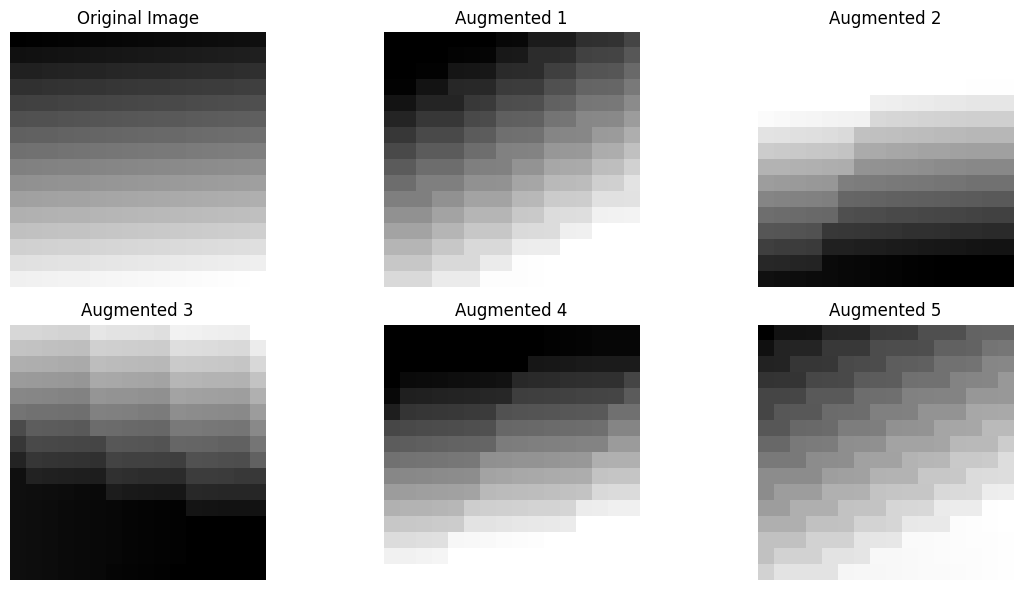

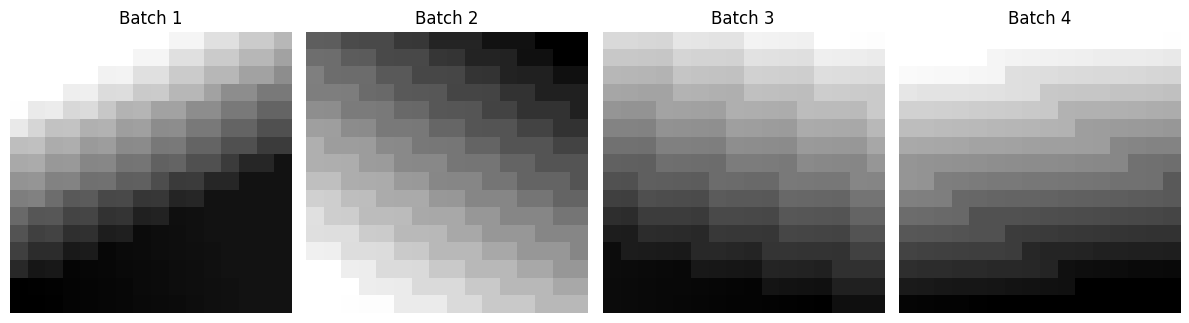

In [4]:
test_image = np.linspace(0, 1, 256).reshape(16, 16)

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.5, 1.5),
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    channel_shift_range=0.1,
    rescale=1.0
)

augmented_images = [datagen.random_transform(test_image) for _ in range(5)]

plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.imshow(test_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

for i, img in enumerate(augmented_images, start=2):
    plt.subplot(2, 3, i)
    plt.imshow(img, cmap='gray')
    plt.title(f"Augmented {i-1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

batch_size = 4
x = np.expand_dims(test_image, axis=(0, -1))
x = np.repeat(x, 10, axis=0)

flow = datagen.flow(x, batch_size=batch_size, shuffle=True, seed=42)

batch = next(flow)

plt.figure(figsize=(12, 6))
for i in range(batch_size):
    plt.subplot(1, batch_size, i + 1)
    plt.imshow(batch[i].squeeze(), cmap='gray')
    plt.title(f"Batch {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## On a MNIST (still simple tho)

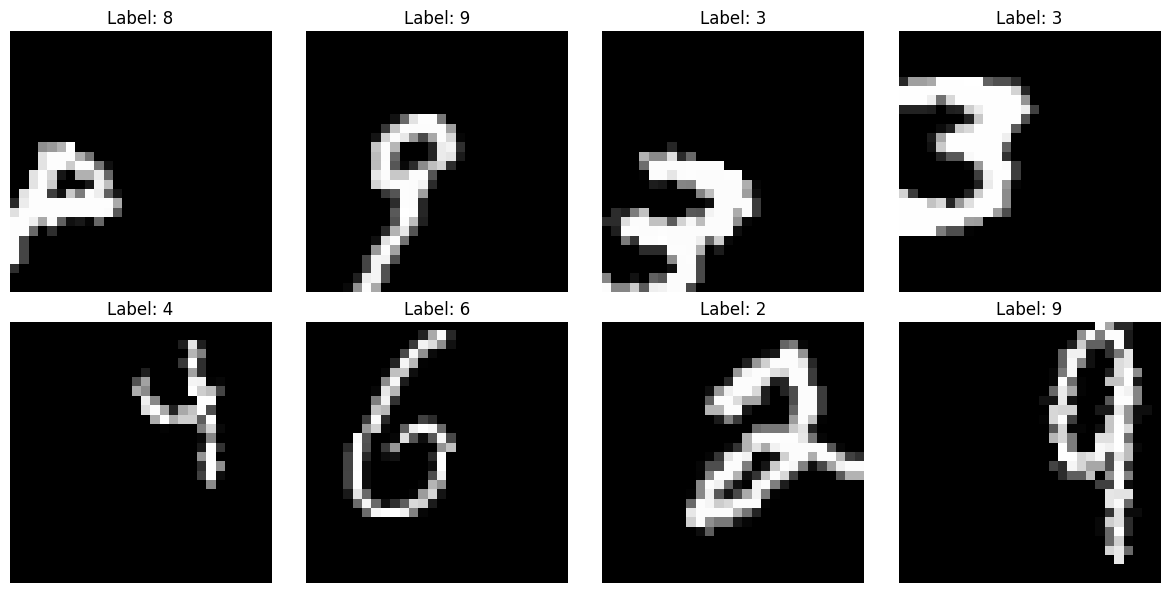

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.5, 1.5),
    horizontal_flip=False,
    vertical_flip=False,
    zoom_range=0.2,
    rescale=1.0
)

batch_size = 8
flow = datagen.flow(x_train[:32], y_train[:32], batch_size=batch_size, shuffle=True, seed=42)

batch_x, batch_y = next(flow)

plt.figure(figsize=(12, 6))
for i in range(batch_size):
    plt.subplot(2, 4, i + 1)
    plt.imshow(batch_x[i].squeeze(), cmap='gray')
    plt.title(f"Label: {batch_y[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()